How to use: 

1. Download ffmpeg file and put it somewhere on your computer.
2. Define the path to the ffmpeg.exe file on your computer as "FFmpeg1 = path", e.g.
    Ffmpeg1 = "C:/Users/blablabla/ffmpeg.exe"
3. Run the c++ code and save the .txt files as follows:
    folder structure:
        dataset1
        output (this can be an empty or a filled folder)
        src (this is the folder with the git stuff)
4. If you want to have a movie of your dataset, then put x=1, if you do not want to have a movie, then put x=0. 
5. If you want a burn-in of the dataset, then put y=number of burn-in times, e.g. if you want to "discard" the first 30 time steps, then out y=30. 
6. run this code with: evaluate2("dataset1",x,y), e.g. evaluate("dataset1",0,30).

In [15]:
#convertible or laptop
console = 1
if console == 1:
    FFmpeg1 = "C:/Users/moniq/Dropbox/MA_1/MA_2_Physics-of-Life/project/evaluation/FFmpeg/bin/ffmpeg.exe"
if console == 2:
    FFmpeg1 = "C:/Users/Monique/Dropbox/MA_1/MA_2_Physics-of-Life/project/evaluation/FFmpeg/bin/ffmpeg.exe"

#read files in the "output" folder and generate movie and diagrams to each output file in the folder "evaluation"

#import packages
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
#change to current directory
path = "../output/"

pathdata = "out_agntno_100_noistr_0.000000.txt"
time, agent_index, position_x, position_y, angles = np.loadtxt(path+pathdata,float,skiprows=9,unpack=True)

#extract input parameters from the txt file
lines = np.loadtxt(path+pathdata, dtype=str, skiprows=1, max_rows=8, unpack = True)
for l in lines:
    exec(l)

#rename agent_number as N
N = agent_number

#movie
fig = plt.figure()
positions = plt.scatter(position_x[0:N],position_y[0:N],c=cm.jet(angles[0:N]/(2*np.pi)))
plt.title("N = {}, velocity = {}, noise = {}, radius = {}".format(N,velocity,noise_strength,neighborhood_radius))
text = plt.text(0,-2,"Time: 0")

#update function for movie
def update(i,positions,text):
    #update(time, any further things which should be updated in animation)
    positions.set_offsets(np.transpose([position_x[i*N:(i+1)*N],position_y[i*N:(i+1)*N]]))
    positions.set_color(c=cm.jet(angles[i*N:(i+1)*N]/(2*np.pi)))
    text.set_text("Time: {:.1f}".format(time[i*N]))
    return positions,text

#generate a movie
animation = anim.FuncAnimation(fig,update,np.size(time)//N,fargs=(positions,text),interval=100,blit=False,repeat=False)

#for MP4 files
Writer = anim.FFMpegWriter(fps=10, bitrate=1800)
plt.rcParams["animation.ffmpeg_path"] = FFmpeg1

#save movie
animation.save(pathdata+".mp4", writer=Writer)
plt.show()

#calculations
polarisation = []
meanangle = []

for i in range (np.size(time)//N):
    theta = angles[i*N:(i+1)*N] #in radians for cos functions
    mean_theta = np.mean(theta)
    polarisation.append((1/N) * np.abs(np.sum(theta))) #polarisation per frame
    meanangle.append(np.cos(np.mean(theta)))

#frames
xdata = list(range(1,(np.size(time)//N)+1))

#meanangle
plt.figure()
plt.plot(xdata,meanangle)
plt.xlabel('frame')
plt.ylabel(r'cos(<$\Theta$>)')
plt.grid()
plt.savefig(pathdata+'meanangle.png')
plt.show()

#polarisation
plt.figure()
plt.plot(xdata,)
plt.xlabel('frame')
plt.ylabel(r'1/N $\sum$(<$\Theta$>)')
plt.grid()
plt.savefig(pathdata+'polarisation.png')
plt.show()

sigma = N/(box_size)**2  #particle density
polarisat = np.mean(polarisation) # polarisation

script for all exe files in the folder "output"

In [ ]:
#change to current directory
path = ".."+"/output/"
#path = "../N40v0.03L3eta(0,0.02,1)r1/"

#evaluate all .text files in folder
import glob
pathdata = glob.glob(path+"*.txt")

#output
rho = []
eta = []
polarisat = []
v_a = []
#save calculations in .txt file
f = open(path+'evaluation.txt', 'w')
f.write("N   velocity   L   eta   r   rho   polar_interact_prob   v_a   P   N \n")

for d in range(np.size(pathdata)):
    time, agent_index, position_x, position_y, angles = np.loadtxt(path+pathdata[d],float,skiprows=13,unpack=True)
    #modulos angles from (-pi,pi) to (0,2pi)
    angles = angles % (2*np.pi)
    #extract input parameters from the txt file
    lines = np.loadtxt(path+pathdata[d], dtype=str, skiprows=1, max_rows=9, unpack=True)
    for l in lines:
        exec(l)
    #rename agent_number as N
    N = agent_number
    #movie
    fig = plt.figure()
    plt.set_cmap(cm.jet)
    positions = plt.scatter(position_x[0:N],position_y[0:N],c=cm.jet(angles[0:N]/(2*np.pi)))
    plt.title("N = {}, velocity = {}, noise = {}, radius = {}".format(N,velocity,noise_strength,neighborhood_radius))
    text = plt.text(0,0,"Time: 0")
    #update function for movie
    def update(i,positions,text):
        #update(time, any further things which should be updated in animation)
        positions.set_offsets(np.transpose([position_x[i*N:(i+1)*N],position_y[i*N:(i+1)*N]]))
        positions.set_array(np.asarray([angles[i*N:(i+1)*N]/(2*np.pi),np.linspace(0,1,N)]).flatten())
        text.set_text("Time: {:.1f}".format(time[i*N]))
        return positions,text
    #generate a movie
    animation = anim.FuncAnimation(fig,update,np.size(time)//N,fargs=(positions,text),interval=100,blit=True,repeat=False)
    #for MP4 files
    Writer = anim.FFMpegWriter(fps=5, bitrate=1800)
    plt.rcParams["animation.ffmpeg_path"] = FFmpeg1
    #save movie
    animation.save(pathdata[d]+".mp4", writer=Writer)
    plt.show()
    #calculations
    polarisation = []
    meanangle = []
    av_v = []
    for i in range (np.size(time)//N):
        theta = angles[i*N:(i+1)*N] #in radians for cos functions
        polarisation.append((1/N) * np.abs(np.sum(theta))) #polarisation per frame
        meanangle.append(np.mean(theta))
        if i>0:
            deltax = position_x[i*N:(i+1)*N] - position_x[(i-1)*N:i*N]
            deltay = position_y[i*N:(i+1)*N] - position_y[(i-1)*N:i*N]
            s = np.sqrt(np.sum(deltax)**2 + np.sum(deltay)**2)
            av_v.append((1/(N*velocity*time_step))*s)
    #frames
    xdata = list(range(1,(np.size(time)//N)+1))
    #further calculations:
    #overall particle density
    rho.append(N/(box_size)**2)
    #polarisation: P = 1/N*abs(sum(theta))
    polarisat.append(np.mean(polarisation))
    #noise_strength = eta
    eta.append(noise_strength)
    #average velocity
    v_a.append(np.mean(av_v))
    #further calculations:
    #density
    density = N/(box_size)**2
    #average velocity
    av_velocity = np.mean(av_v)
    #polar order parameter
    #P = np.abs(np.mean(np.exp(1j*np.array(meanangle))))
    Pop = np.abs(np.mean(np.exp(1j*np.array(angles))))
    #nematic order parameter
    #N = np.abs(np.mean(np.exp(2j*np.array(meanangle))))
    Nop = np.abs(np.mean(np.exp(2j*np.array(angles))))
    #save calculated parameters in .txt file
    f.write("%i %5.2f %i %5.4f %5.2f %5.4f %5.6f %5.6f %5.6f \n" % (N, velocity, box_size, noise_strength, neighborhood_radius, density, polar_interact_prob, av_velocity, Pop, Nop))
f.close()

for Viscek paper, figure 2.a)

In [ ]:
#change to current directory
path = "../output/"

#evaluate all .text files in folder
import glob
pathdata = glob.glob(path+"*.txt")

#output
rho = []
eta = []
polarisat = []

for d in range(np.size(pathdata)):
    time, agent_index, position_x, position_y, angles = np.loadtxt(path+pathdata[d],float,skiprows=12,unpack=True)
    #modulos angles from (-pi,pi) to (0,2pi)
    angles = angles % (2*np.pi)
    #extract input parameters from the txt file
    lines = np.loadtxt(path+pathdata[d], dtype=str, skiprows=1, max_rows=9, unpack=True)
    for l in lines:
        exec(l)
    #rename agent_number as N
    N = agent_number
    #movie
    fig = plt.figure()
    plt.set_cmap(cm.jet)
    positions = plt.scatter(position_x[0:N],position_y[0:N],c=cm.jet(angles[0:N]/(2*np.pi)))
    plt.title("N = {}, velocity = {}, noise = {}, radius = {}".format(N,velocity,noise_strength,neighborhood_radius))
    text = plt.text(0,0,"Time: 0")
    #update function for movie
    def update(i,positions,text):
        #update(time, any further things which should be updated in animation)
        positions.set_offsets(np.transpose([position_x[i*N:(i+1)*N],position_y[i*N:(i+1)*N]]))
        positions.set_array(np.asarray([angles[i*N:(i+1)*N]/(2*np.pi),np.linspace(0,1,N)]).flatten())
        text.set_text("Time: {:.1f}".format(time[i*N]))
        return positions,text
    #generate a movie
    animation = anim.FuncAnimation(fig,update,np.size(time)//N,fargs=(positions,text),interval=100,blit=True,repeat=False)
    #for MP4 files
    Writer = anim.FFMpegWriter(fps=5, bitrate=1800)
    plt.rcParams["animation.ffmpeg_path"] = "C:/Users/moniq/Dropbox/MA_1/MA_2_Physics-of-Life/project/evaluation/FFmpeg/bin/ffmpeg.exe"
    #save movie
    animation.save(pathdata[d]+".mp4", writer=Writer)
    plt.show()
    #calculations
    polarisation = []
    meanangle = []
    average_velocity = []
    deltaxx = []
    deltayy = []
    for i in range (np.size(time)//N):
        theta = angles[i*N:(i+1)*N] #in radians for cos functions
        mean_theta = np.mean(theta)
        polarisation.append((1/N) * np.abs(np.sum(theta))) #polarisation per frame
        meanangle.append(np.cos(np.mean(theta)))
        if i>0:
            deltax = position_x[i*N:(i+1)*N] - position_x[(i-1)*N:i*N]
            deltay = position_y[i*N:(i+1)*N] - position_y[(i-1)*N:i*N]
            deltaxx.append(np.mean(deltax))
            deltayy.append(np.mean(deltay))
            s = np.sqrt(np.sum(deltax)**2 + np.sum(deltay)**2)
            average_velocity.append((1/(N*velocity*time_step))*s)
    #frames
    xdata = list(range(1,(np.size(time)//N)+1))
    #average velocity
    plt.figure()
    plt.plot(average_velocity)
    plt.show()
    #
    plt.figure()
    plt.plot(deltaxx)
    plt.plot(deltayy)
    plt.show()
    #
    print(np.mean(average_velocity),"+-",np.std(average_velocity))
    #
    plt.figure()
    plt.hist(s)
    plt.show()

In [ ]:
def evaluation(foldername,movie):
    'movie=1 .. movie on'
    'movie=0 .. movie off'
    #change to current directory
    path = "../"+foldername+"/"
    #evaluate all .text files in folder
    pathdata = glob.glob(path+"*.txt")
    #output
    rho = []
    eta = []
    polarisat = []
    v_a = []
    #save calculations in .txt file
    f = open(path+'evaluation_'+foldername+'.txt', 'w')
    f.write("N   velocity   L   eta   r   rho   v_a   P   N \n")
    #iteration through all .txt files within the folder
    for d in range(np.size(pathdata)):
        time, agent_index, position_x, position_y, angles = np.loadtxt(path+pathdata[d],float,skiprows=12,unpack=True)
        #modulos angles from (-pi,pi) to (0,2pi)
        angles = angles % (2*np.pi)
        #extract input parameters from the txt file
        lines = np.loadtxt(path+pathdata[d], dtype=str, skiprows=1, max_rows=9, unpack=True)
        for l in lines:
            exec(l)
        #rename agent_number as N
        N = agent_number
        #movie
        fig = plt.figure()
        plt.set_cmap(cm.jet)
        positions = plt.scatter(position_x[0:N],position_y[0:N],c=cm.jet(angles[0:N]/(2*np.pi)))
        plt.title("N = {}, velocity = {}, noise = {}, radius = {}".format(N,velocity,noise_strength,neighborhood_radius))
        text = plt.text(0,0,"Time: 0")
        #update function for movie
        def update(i,positions,text):
            #update(time, any further things which should be updated in animation)
            positions.set_offsets(np.transpose([position_x[i*N:(i+1)*N],position_y[i*N:(i+1)*N]]))
            positions.set_array(np.asarray([angles[i*N:(i+1)*N]/(2*np.pi),np.linspace(0,1,N)]).flatten())
            text.set_text("Time: {:.1f}".format(time[i*N]))
            return positions,text
        if movie == 1:
            #generate a movie
            animation = anim.FuncAnimation(fig,update,np.size(time)//N,fargs=(positions,text),interval=100,blit=True,repeat=False)
            #for MP4 files
            Writer = anim.FFMpegWriter(fps=10, bitrate=1800)
            plt.rcParams["animation.ffmpeg_path"] = FFmpeg1
            #save movie
            animation.save(pathdata[d]+".mp4", writer=Writer)
            plt.show()
        #calculations
        polarisation = []
        meanangle = []
        av_v = []
        for i in range (np.size(time)//N):
            theta = angles[i*N:(i+1)*N] #in radians for cos functions
            polarisation.append((1/N) * np.abs(np.sum(theta))) #polarisation per frame
            meanangle.append(np.mean(theta))
            if i>0:
                deltax = position_x[i*N:(i+1)*N] - position_x[(i-1)*N:i*N]
                deltay = position_y[i*N:(i+1)*N] - position_y[(i-1)*N:i*N]
                s = np.sqrt(np.sum(deltax)**2 + np.sum(deltay)**2)
                av_v.append((1/(N*velocity*time_step))*s)
        #frames
        xdata = list(range(1,(np.size(time)//N)+1))
        #further calculations:
        #overall particle density
        rho.append(N/(box_size)**2)
        #polarisation: P = 1/N*abs(sum(theta))
        polarisat.append(np.mean(polarisation))
        #noise_strength = eta
        eta.append(noise_strength)
        #average velocity
        v_a.append(np.mean(av_v))
        #further calculations:
        #density
        density = N/(box_size)**2
        #average velocity
        av_velocity = np.mean(av_v)
        #polar order parameter
        #P = np.abs(np.mean(np.exp(1j*np.array(meanangle))))
        P = np.abs(np.mean(np.exp(1j*np.array(angles))))
        #nematic order parameter
        #N = np.abs(np.mean(np.exp(2j*np.array(meanangle))))
        N = np.abs(np.mean(np.exp(2j*np.array(angles))))
        #save calculated parameters in .txt file
        f.write("%i %5.2f %5.1f %5.4f %5.2f %5.4f %5.6f %5.6f %5.6f \n" % (N, velocity, box_size, noise_strength, neighborhood_radius, density, av_velocity, P, N))
    f.close()
    return print("finished")

In [ ]:
def update(i,positions,text,position_x,position_y,N,angles,time):
    #update(time, any further things which should be updated in animation)
    positions.set_offsets(np.transpose([position_x[i*N:(i+1)*N],position_y[i*N:(i+1)*N]]))
    positions.set_array(np.asarray([angles[i*N:(i+1)*N]/(2*np.pi),np.linspace(0,1,N)]).flatten())
    text.set_text("Time: {:.1f}".format(time[i*N]))
    return positions,text

def evaluation2(foldername,movie):
    #'movie=1 .. movie on'
    #'movie=0 .. movie off'
    #change to current directory
    path = "../"+foldername+"/"
    #evaluate all .text files in folder
    #import glob
    pathdata = glob.glob(path+"*.txt")
    #output
    rho = []
    eta = []
    polarisat = []
    v_a = []
    #save calculations in .txt file
    plotpath = "../plots/"
    f = open(plotpath+'evaluation_'+foldername+'.txt', 'w')
    f.write("N   velocity   L   eta   r   rho   v_a   P   N \n")
    for d in range(np.size(pathdata)):
        #extract input parameters from the txt file
        lines = np.loadtxt(path+pathdata[d], dtype=str, skiprows=1, max_rows=9, unpack=True)
        for i,l in enumerate(lines):
            k = l.find("=")
            value = eval(l[k+1:])
            if i==0: dim = value
            elif i==1: agent_number = value
            elif i==2: velocity = value
            elif i==3: box_size = value
            elif i==4: noise_strength = value
            elif i==5: neighborhood_radius = value
            elif i==6: pbc = value
            elif i==7: time_total = value
            elif i==8: time_step = value
        print("N = ", agent_number)
        #rename agent_number as N
        N = agent_number
        burnin = 12 # for all times
        #burnin = 12 + 30*N # for time 30 to 130
        time, agent_index, position_x, position_y, angles = np.loadtxt(path+pathdata[d],float,skiprows=burnin,unpack=True)
        #modulos angles from (-pi,pi) to (0,2pi)
        angles = angles % (2*np.pi)
        #movie
        fig = plt.figure(figsize=(5,5))
        plt.set_cmap(cm.hsv)
        positions = plt.scatter(position_x[0:N],position_y[0:N],c=cm.hsv(angles[0:N]/(2*np.pi)),s=3)
        plt.title("N = {}, velocity = {}, noise = {}, radius = {}".format(N,velocity,noise_strength,neighborhood_radius))
        text = plt.text(0,0,"Time: 0")
        #update function for movie
        if movie:
            #generate a movie
            animation = anim.FuncAnimation(fig,update,np.size(time)//N,fargs=(positions,text,position_x,position_y,N,angles,time),interval=100,blit=True,repeat=False)
            #for MP4 files
            Writer = anim.FFMpegWriter(fps=10, bitrate=1800)
            plt.rcParams["animation.ffmpeg_path"] = FFmpeg1
            #save movie
            animation.save(pathdata[d]+".mp4", writer=Writer)
            plt.show()
        plt.close()
        del(fig)
        #calculations
        polarisation = []
        polarop = []
        nematicop = []
        meanangle = []
        av_v = []
        for i in range (np.size(time)//N):
            theta = angles[i*N:(i+1)*N] #in radians for cos functions
            polarisation.append((1/N) * np.abs(np.sum(theta))) #polarisation per frame
            meanangle.append(np.mean(theta))
            s = np.sqrt(np.sum(np.cos(theta))**2 + np.sum(np.sin(theta))**2)
            av_v.append(s/(N))
            polarop.append(np.abs(np.mean(np.exp(1j*np.array(theta)))))
            nematicop.append(np.abs(np.mean(np.exp(2j*np.array(theta)))))
        #figure for polar and nematic order parameter
        plt.figure()
        plt.plot(polarop,label="polar")
        plt.plot(nematicop,label="nematic")
        plt.legend()
        plt.title("N={}, v={}, L={}, eta={}\n".format(N, velocity, box_size, noise_strength))
        plt.savefig(pathdata[d]+".png")
        plt.show()
        #frames
        xdata = list(range(1,(np.size(time)//N)+1))
        #further calculations:
        #overall particle density
        rho.append(N/(box_size)**2)
        #polarisation: P = 1/N*abs(sum(theta))
        polarisat.append(np.mean(polarisation))
        #noise_strength = eta
        eta.append(noise_strength)
        #average velocity
        v_a.append(np.mean(av_v))
        #further calculations:
        #density
        density = N/(box_size)**2
        #average velocity
        av_velocity = np.mean(av_v)
        #polar order parameter
        #P = np.abs(np.mean(np.exp(1j*np.array(meanangle))))
        Pop = np.abs(np.mean(np.exp(1j*np.array(angles))))
        #nematic order parameter
        #N = np.abs(np.mean(np.exp(2j*np.array(meanangle))))
        Nop = np.abs(np.mean(np.exp(2j*np.array(angles))))
        #save calculated parameters in .txt file
        f.write("{}  {}  {}  {}  {}  {}  {}  {}  {}\n".format(N, velocity, box_size, noise_strength, neighborhood_radius, density, av_velocity, Pop, Nop))
    f.close()
    return print("finished")

In [ ]:
def update(i,positions,text,position_x,position_y,N,angles,time):
    #update(time, any further things which should be updated in animation)
    positions.set_offsets(np.transpose([position_x[i*N:(i+1)*N],position_y[i*N:(i+1)*N]]))
    positions.set_array(np.asarray([angles[i*N:(i+1)*N]/(2*np.pi),np.linspace(0,1,N)]).flatten())
    text.set_text("Time: {:.1f}".format(time[i*N]))
    return positions,text

def evaluation2(foldername,movie,burnin_start):
    #'movie=1 .. movie on'
    #'movie=0 .. movie off'
    #change to current directory
    path = "../"+foldername+"/"
    #evaluate all .text files in folder
    #import glob
    pathdata = glob.glob(path+"*.txt")
    #output
    rho = []
    eta = []
    polarisat = []
    v_a = []
    #save calculations in .txt file
    plotpath = "../plots/"
    f = open(plotpath+'evaluation_'+foldername+'.txt', 'w')
    f.write("N   velocity   L   eta   r   rho   v_a   P   N   burnin={}\n".format(burnin_start))
    for d in range(np.size(pathdata)):
        #extract input parameters from the txt file
        lines = np.loadtxt(pathdata[d], dtype=str, skiprows=1, max_rows=10, unpack=True)
        for i,l in enumerate(lines):
            k = l.find("=")
            value = eval(l[k+1:])
            if i==0: dim = value
            elif i==1: agent_number = value
            elif i==2: velocity = value
            elif i==3: box_size = value
            elif i==4: noise_strength = value
            elif i==5: neighborhood_radius = value
            elif i==6: pbc = value
            elif i==7: time_total = value
            elif i==8: time_step = value
            elif i==9: polar_interact_prob = value
        #rename agent_number as N
        N = agent_number
        #burnin = 13 # for all times
        #burnin = 13 + 30*N # for time 30 to 130
        burnin = 13 + burnin_start*N
        time, agent_index, position_x, position_y, angles = np.loadtxt(pathdata[d],float,skiprows=burnin,unpack=True)
        print("time:", max(time), " for eta = ", noise_strength)
        #modulos angles from (-pi,pi) to (0,2pi)
        angles = angles % (2*np.pi)
        #movie
        fig = plt.figure(figsize=(5,5))
        plt.set_cmap(cm.hsv)
        positions = plt.scatter(position_x[0:N],position_y[0:N],c=cm.hsv(angles[0:N]/(2*np.pi)),s=3)
        plt.title("N = {}, velocity = {}, noise = {}, radius = {}".format(N,velocity,noise_strength,neighborhood_radius))
        text = plt.text(0,0,"Time: 0")
        #update function for movie
        if movie:
            #generate a movie
            animation = anim.FuncAnimation(fig,update,np.size(time)//N,fargs=(positions,text,position_x,position_y,N,angles,time),interval=100,blit=True,repeat=False)
            #for MP4 files
            Writer = anim.FFMpegWriter(fps=10, bitrate=1800)
            plt.rcParams["animation.ffmpeg_path"] = FFmpeg1
            #save movie
            animation.save(pathdata[d]+".mp4", writer=Writer)
            plt.show()
        plt.close()
        del(fig)
        #calculations
        polarisation = []
        polarop = []
        nematicop = []
        meanangle = []
        av_v = []
        for i in range (np.size(time)//N):
            theta = angles[i*N:(i+1)*N] #in radians for cos functions
            polarisation.append((1/N) * np.abs(np.sum(theta))) #polarisation per frame
            meanangle.append(np.mean(theta))
            s = np.sqrt(np.sum(np.cos(theta))**2 + np.sum(np.sin(theta))**2)
            av_v.append(s/(N))
            polarop.append(np.abs(np.mean(np.exp(1j*np.array(theta)))))
            nematicop.append(np.abs(np.mean(np.exp(2j*np.array(theta)))))
        #figure for polar and nematic order parameter
        plt.figure()
        plt.plot(polarop,label="polar")
        plt.plot(nematicop,label="nematic")
        plt.legend()
        plt.title("N={}, v={}, L={}, eta={}\n".format(N, velocity, box_size, noise_strength))
        #plt.savefig(pathdata[d]+".png")
        plt.show()
        #frames
        xdata = list(range(1,(np.size(time)//N)+1))
        #further calculations:
        #overall particle density
        rho.append(N/(box_size)**2)
        #polarisation: P = 1/N*abs(sum(theta))
        polarisat.append(np.mean(polarisation))
        #noise_strength = eta
        eta.append(noise_strength)
        #average velocity
        v_a.append(np.mean(av_v))
        #further calculations:
        #density
        density = N/(box_size)**2
        #average velocity
        av_velocity = np.mean(av_v)
        #polar order parameter
        #P = np.abs(np.mean(np.exp(1j*np.array(meanangle))))
        Pop = np.abs(np.mean(np.exp(1j*np.array(angles))))
        #nematic order parameter
        #N = np.abs(np.mean(np.exp(2j*np.array(meanangle))))
        Nop = np.abs(np.mean(np.exp(2j*np.array(angles))))
        #save calculated parameters in .txt file
        f.write("{}  {}  {}  {}  {}  {}  {}  {}  {}  {}\n".format(N, velocity, box_size, noise_strength, neighborhood_radius, density, av_velocity, Pop, Nop))
    f.close()
    return print("finished")

In [ ]:
def update(i,positions,text,position_x,position_y,N,angles,time):
    #update(time, any further things which should be updated in animation)
    positions.set_offsets(np.transpose([position_x[i*N:(i+1)*N],position_y[i*N:(i+1)*N]]))
    positions.set_array(np.asarray([angles[i*N:(i+1)*N]/(2*np.pi),np.linspace(0,1,N)]).flatten())
    text.set_text("Time: {:.1f}".format(time[i*N]))
    return positions,text

def evaluation2(foldername,movie,burnin_start):
    #'movie=1 .. movie on'
    #'movie=0 .. movie off'
    #change to current directory
    path = "../"+foldername+"/"
    #evaluate all .text files in folder
    #import glob
    pathdata = glob.glob(path+"*.txt")
    #output
    rho = []
    eta = []
    polarisat = []
    v_a = []
    #save calculations in .txt file
    plotpath = "../plots/"
    f = open(plotpath+'evaluation_'+foldername+'.txt', 'w')
    f.write("N   velocity   L   eta   r   rho   v_a   P   N   polar_interact_prob   burnin={}\n".format(burnin_start))
    for d in range(np.size(pathdata)):
        #extract input parameters from the txt file
        lines = np.loadtxt(pathdata[d], dtype=str, skiprows=1, max_rows=10, unpack=True)
        for i,l in enumerate(lines):
            k = l.find("=")
            value = eval(l[k+1:])
            if i==0: dim = value
            elif i==1: agent_number = value
            elif i==2: velocity = value
            elif i==3: box_size = value
            elif i==4: noise_strength = value
            elif i==5: neighborhood_radius = value
            elif i==6: pbc = value
            elif i==7: time_total = value
            elif i==8: time_step = value
            elif i==9: polar_interact_prob = value
        #rename agent_number as N
        N = agent_number
        #burnin = 13 # for all times
        #burnin = 13 + 30*N # for time 30 to 130
        burnin = 13 + burnin_start*N
        time, agent_index, position_x, position_y, angles = np.loadtxt(pathdata[d],float,skiprows=burnin,unpack=True)
        print("time:", max(time), " for eta = ", noise_strength)
        #modulos angles from (-pi,pi) to (0,2pi)
        angles = angles % (2*np.pi)
        #movie
        fig = plt.figure(figsize=(5,5))
        plt.set_cmap(cm.hsv)
        positions = plt.scatter(position_x[0:N],position_y[0:N],c=cm.hsv(angles[0:N]/(2*np.pi)),s=3)
        plt.title("N = {}, velocity = {}, noise = {}, radius = {}".format(N,velocity,noise_strength,neighborhood_radius))
        text = plt.text(0,0,"Time: 0")
        #update function for movie
        if movie:
            #generate a movie
            animation = anim.FuncAnimation(fig,update,np.size(time)//N,fargs=(positions,text,position_x,position_y,N,angles,time),interval=100,blit=True,repeat=False)
            #for MP4 files
            Writer = anim.FFMpegWriter(fps=10, bitrate=1800)
            plt.rcParams["animation.ffmpeg_path"] = FFmpeg1
            #save movie
            animation.save(pathdata[d]+".mp4", writer=Writer)
            plt.show()
        plt.close()
        del(fig)
        #calculations
        polarisation = []
        polarop = []
        nematicop = []
        meanangle = []
        av_v = []
        for i in range (np.size(time)//N):
            theta = angles[i*N:(i+1)*N] #in radians for cos functions
            polarisation.append((1/N) * np.abs(np.sum(theta))) #polarisation per frame
            meanangle.append(np.mean(theta))
            s = np.sqrt(np.sum(np.cos(theta))**2 + np.sum(np.sin(theta))**2)
            av_v.append(s/(N))
            polarop.append(np.abs(np.mean(np.exp(1j*np.array(theta)))))
            nematicop.append(np.abs(np.mean(np.exp(2j*np.array(theta)))))
        #figure for polar and nematic order parameter
        plt.figure()
        plt.plot(polarop,label="polar")
        plt.plot(nematicop,label="nematic")
        plt.legend()
        plt.title("N={}, v={}, L={}, eta={}\n".format(N, velocity, box_size, noise_strength))
        #plt.savefig(pathdata[d]+".png")
        plt.show()
        #frames
        xdata = list(range(1,(np.size(time)//N)+1))
        #further calculations:
        #overall particle density
        rho.append(N/(box_size)**2)
        #polarisation: P = 1/N*abs(sum(theta))
        polarisat.append(np.mean(polarisation))
        #noise_strength = eta
        eta.append(noise_strength)
        #average velocity
        v_a.append(np.mean(av_v))
        #further calculations:
        #density
        density = N/(box_size)**2
        #average velocity
        av_velocity = np.mean(av_v)
        #polar order parameter
        #P = np.abs(np.mean(np.exp(1j*np.array(meanangle))))
        Pop = np.abs(np.mean(np.exp(1j*np.array(angles))))
        #nematic order parameter
        #N = np.abs(np.mean(np.exp(2j*np.array(meanangle))))
        Nop = np.abs(np.mean(np.exp(2j*np.array(angles))))
        #save calculated parameters in .txt file
        f.write("{}  {}  {}  {}  {}  {}  {}  {}  {}  {}\n".format(N, velocity, box_size, noise_strength, neighborhood_radius, density, polar_interact_prob, av_velocity, Pop, Nop))
    f.close()
    return print("finished")

In [ ]:
evaluation2("N40v0.03L3eta(0,0.02,1)r1t500",0,200)
evaluation2("N100v0.03L5eta(0,0.02,1)r1t500",0,200)
evaluation2("N400v0.03L10eta(0,0.02,1)r1t500",0,200)

In [ ]:
evaluation2("N4000v0.03L32eta(0,0.02,1)r1t500",0,200)
evaluation2("run N10000v0.03L50eta(0,0.02,1)r1t500",0,200)

In [ ]:
evaluation2("N4000v0.03L32eta(0,0.02,1)r1t500",0,200)
evaluation2("N10000v0.03L50eta(0,0.02,1)r1t500",0,200)

In [ ]:
evaluation2("nematic",1,0)

In [16]:
def update(i,positions,text,position_x,position_y,N,angles,time):
    #update(time, any further things which should be updated in animation)
    positions.set_offsets(np.transpose([position_x[i*N:(i+1)*N],position_y[i*N:(i+1)*N]]))
    positions.set_array(np.asarray([angles[i*N:(i+1)*N]/(2*np.pi),np.linspace(0,1,N)]).flatten())
    text.set_text("Time: {:.1f}".format(time[i*N]))
    return positions,text

def evaluation2(foldername,movie,burnin_start):
    #'movie=1 .. movie on'
    #'movie=0 .. movie off'
    #change to current directory
    path = "../"+foldername+"/"
    #evaluate all .text files in folder
    #import glob
    pathdata = glob.glob(path+"*.txt")
    #output
    rho = []
    eta = []
    polarisat = []
    v_a = []
    #save calculations in .txt file
    plotpath = "../plots/"
    f = open(plotpath+'evaluation_'+foldername+'.txt', 'w')
    f.write("N   velocity   L   eta   r   rho   v_a   P   N   polar_interact_prob   burnin={}\n".format(burnin_start))
    for d in range(np.size(pathdata)):
        #extract input parameters from the txt file
        lines = np.loadtxt(pathdata[d], dtype=str, skiprows=1, max_rows=10, unpack=True)
        for i,l in enumerate(lines):
            k = l.find("=")
            value = eval(l[k+1:])
            if i==0: dim = value
            elif i==1: agent_number = value
            elif i==2: velocity = value
            elif i==3: box_size = value
            elif i==4: noise_strength = value
            elif i==5: neighborhood_radius = value
            elif i==6: pbc = value
            elif i==7: time_total = value
            elif i==8: time_step = value
            elif i==9: polar_interact_prob = value
        #rename agent_number as N
        N = agent_number
        #burnin = 13 # for all times
        #burnin = 13 + 30*N # for time 30 to 130
        burnin = 13 + burnin_start*N
        time, agent_index, position_x, position_y, angles = np.loadtxt(pathdata[d],float,skiprows=burnin,unpack=True)
        print("time:", max(time), " for eta = ", noise_strength)
        #modulos angles from (-pi,pi) to (0,2pi)
        angles = angles % (2*np.pi)
        #movie
        fig = plt.figure(figsize=(5,5))
        plt.set_cmap(cm.hsv)
        positions = plt.scatter(position_x[0:N],position_y[0:N],c=cm.hsv(angles[0:N]/(2*np.pi)),s=1)
        plt.title(r"N = {}, v = {}, L = {}, $\eta$ = {}, r = {}".format(N,velocity,box_size,noise_strength,neighborhood_radius))
        text = plt.text(0,0,"Time: 0")
        #update function for movie
        if movie:
            #generate a movie
            animation = anim.FuncAnimation(fig,update,np.size(time)//N,fargs=(positions,text,position_x,position_y,N,angles,time),interval=100,blit=True,repeat=False)
            #for MP4 files
            Writer = anim.FFMpegWriter(fps=10, bitrate=1800)
            plt.rcParams["animation.ffmpeg_path"] = FFmpeg1
            #save movie
            plt.xlim((0, box_size))
            plt.ylim((0, box_size))
            animation.save(pathdata[d]+".mp4", writer=Writer)
            plt.show()
        plt.close()
        del(fig)
        #calculations
        polarisation = []
        polarop = []
        nematicop = []
        meanangle = []
        av_v = []
        for i in range (np.size(time)//N):
            theta = angles[i*N:(i+1)*N] #in radians for cos functions
            polarisation.append((1/N) * np.abs(np.sum(theta))) #polarisation per frame
            meanangle.append(np.mean(theta))
            s = np.sqrt(np.sum(np.cos(theta))**2 + np.sum(np.sin(theta))**2)
            av_v.append(s/(N))
            polarop.append(np.abs(np.mean(np.exp(1j*np.array(theta)))))
            nematicop.append(np.abs(np.mean(np.exp(2j*np.array(theta)))))
        #figure for polar and nematic order parameter
        plt.figure()
        plt.plot(polarop,label="polar")
        plt.plot(nematicop,label="nematic")
        plt.legend()
        plt.title("N={}, v={}, L={}, eta={}\n".format(N, velocity, box_size, noise_strength))
        #plt.savefig(pathdata[d]+".png")
        plt.show()
        #frames
        xdata = list(range(1,(np.size(time)//N)+1))
        #further calculations:
        #overall particle density
        rho.append(N/(box_size)**2)
        #polarisation: P = 1/N*abs(sum(theta))
        polarisat.append(np.mean(polarisation))
        #noise_strength = eta
        eta.append(noise_strength)
        #average velocity
        v_a.append(np.mean(av_v))
        #further calculations:
        #density
        density = N/(box_size)**2
        #average velocity
        av_velocity = np.mean(av_v)
        #polar order parameter
        #P = np.abs(np.mean(np.exp(1j*np.array(meanangle))))
        Pop = np.abs(np.mean(np.exp(1j*np.array(angles))))
        #nematic order parameter
        #N = np.abs(np.mean(np.exp(2j*np.array(meanangle))))
        Nop = np.abs(np.mean(np.exp(2j*np.array(angles))))
        #save calculated parameters in .txt file
        f.write("{}  {}  {}  {}  {}  {}  {}  {}  {}  {}\n".format(N, velocity, box_size, noise_strength, neighborhood_radius, density, av_velocity, Pop, Nop, polar_interact_prob))
    f.close()
    return print("finished")

In [ ]:
evaluation2("2007",1,0)

In [ ]:
x = [1,2,3,4,5,6,7,8]
y = [1,2,3,4,5,6,7,8]
angles = [10,20,30,40,50,60,70,80]

plt.figure(figsize=(5,5))
for i in range(len(x)):
    plt.plot(x[i],y[i],'o',marker=(3, 0, angles[i]))
plt.show()

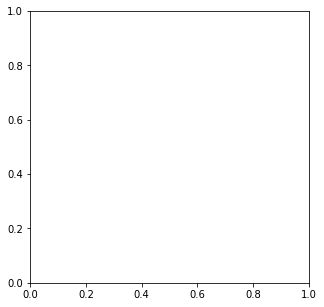

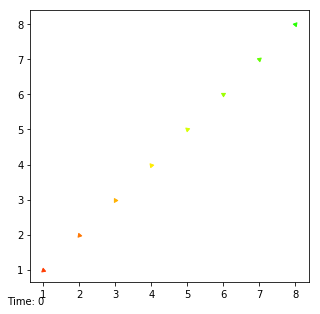

In [12]:
x = [1,2,3,4,5,6,7,8]
y = [1,2,3,4,5,6,7,8]
angles = [10,20,30,40,50,60,70,80]

fig = plt.figure(figsize=(5,5))
plt.set_cmap(cm.hsv)
for i in range(len(x)):
    positions = plt.scatter(x[i],y[i],c=cm.hsv(angles[i]),s=20,marker=(3, 0, angles[i]))
    #plt.title("N = {}, velocity = {}, noise = {}, radius = {}".format(N,velocity,noise_strength,neighborhood_radius))
text = plt.text(0,0,"Time: 0")

plt.show()

In [11]:
x = [1,2,3,4,5,6,7,8]
y = [1,2,3,4,5,6,7,8]
angles = [10,20,30,40,50,60,70,80]

plt.figure(figsize=(5,5))
#plt.set_cmap(cm.hsv)
plt.plot(x,y,s=20,marker=(3,0,angles))
    #positions = plt.scatter(x[i],y[i],c=cm.hsv(angles[i]),s=20,marker=(3, 0, angles[i]))
    #plt.title("N = {}, velocity = {}, noise = {}, radius = {}".format(N,velocity,noise_strength,neighborhood_radius))
#text = plt.text(0,0,"Time: 0")

plt.show()

TypeError: can't multiply sequence by non-int of type 'float'

In [6]:
def update(i,positions,text,position_x,position_y,N,angles,time,histx,histy):
    #update(time, any further things which should be updated in animation)
    positions.set_offsets(np.transpose([position_x[i*N:(i+1)*N],position_y[i*N:(i+1)*N]]))
    positions.set_array(np.asarray([angles[i*N:(i+1)*N]/(2*np.pi),np.linspace(0,1,N)]).flatten())
    text.set_text("Time: {:.1f}".format(time[i*N]))
    histx.
    return positions,text,histx,histy

def evaluation3(foldername,movie,burnin_start):
    #'movie=1 .. movie on'
    #'movie=0 .. movie off'
    #change to current directory
    path = "../"+foldername+"/"
    #evaluate all .text files in folder
    #import glob
    pathdata = glob.glob(path+"*.txt")
    #output
    rho = []
    eta = []
    polarisat = []
    v_a = []
    #save calculations in .txt file
    plotpath = "../plots/"
    f = open(plotpath+'evaluation_'+foldername+'.txt', 'w')
    f.write("N   velocity   L   eta   r   rho   v_a   P   N   polar_interact_prob   burnin={}\n".format(burnin_start))
    for d in range(np.size(pathdata)):
        #extract input parameters from the txt file
        lines = np.loadtxt(pathdata[d], dtype=str, skiprows=1, max_rows=10, unpack=True)
        for i,l in enumerate(lines):
            k = l.find("=")
            value = eval(l[k+1:])
            if i==0: dim = value
            elif i==1: agent_number = value
            elif i==2: velocity = value
            elif i==3: box_size = value
            elif i==4: noise_strength = value
            elif i==5: neighborhood_radius = value
            elif i==6: pbc = value
            elif i==7: time_total = value
            elif i==8: time_step = value
            elif i==9: polar_interact_prob = value
        #rename agent_number as N
        N = agent_number
        #burnin = 13 # for all times
        #burnin = 13 + 30*N # for time 30 to 130
        burnin = 13 + burnin_start*N
        time, agent_index, position_x, position_y, angles = np.loadtxt(pathdata[d],float,skiprows=burnin,unpack=True)
        print("time:", max(time), " for eta = ", noise_strength)
        #modulos angles from (-pi,pi) to (0,2pi)
        angles = angles % (2*np.pi)
        #movie
        fig, axScatter = plt.subplots(figsize=(12, 12))
        plt.set_cmap(cm.hsv)
        # the scatter plot:
        positions = axScatter.scatter(position_x[0:N],position_y[0:N],c=cm.hsv(angles[0:N]/(2*np.pi)),s=3)
        axScatter.set_aspect(1.)
        #new axes on right and on top of scattering plot
        divider = make_axes_locatable(axScatter)
        axHistx = divider.append_axes("top", 1.2, pad=0.1, sharex=axScatter)
        axHisty = divider.append_axes("right", 1.2, pad=0.1, sharey=axScatter)
        # make some labels invisible
        axHistx.xaxis.set_tick_params(labelbottom=False)
        axHisty.yaxis.set_tick_params(labelleft=False)
        #bins by hand
        bins = 20
        histx = axHistx.hist(position_x[0:N], bins=bins)#,density=True)
        histy = axHisty.hist(position_y[0:N], bins=bins, orientation='horizontal')#,density=True)
        #axScatter.title("N = {}, velocity = {}, noise = {}, radius = {}".format(N,velocity,noise_strength,neighborhood_radius))
        text = plt.text(0,0,"Time: 0")
        #update function for movie
        if movie:
            #generate a movie
            animation = anim.FuncAnimation(fig,update,np.size(time)//N,fargs=(positions,text,position_x,position_y,N,angles,time,histx,histy),interval=100,blit=True,repeat=False)
            #for MP4 files
            Writer = anim.FFMpegWriter(fps=10, bitrate=1800)
            plt.rcParams["animation.ffmpeg_path"] = FFmpeg1
            #save movie
            animation.save(pathdata[d]+".mp4", writer=Writer)
            plt.show()
        plt.close()
        del(fig)
        #calculations
        polarisation = []
        polarop = []
        nematicop = []
        meanangle = []
        av_v = []
        for i in range (np.size(time)//N):
            theta = angles[i*N:(i+1)*N] #in radians for cos functions
            polarisation.append((1/N) * np.abs(np.sum(theta))) #polarisation per frame
            meanangle.append(np.mean(theta))
            s = np.sqrt(np.sum(np.cos(theta))**2 + np.sum(np.sin(theta))**2)
            av_v.append(s/(N))
            polarop.append(np.abs(np.mean(np.exp(1j*np.array(theta)))))
            nematicop.append(np.abs(np.mean(np.exp(2j*np.array(theta)))))
        #figure for polar and nematic order parameter
        plt.figure()
        plt.plot(polarop,label="polar")
        plt.plot(nematicop,label="nematic")
        plt.legend()
        plt.title("N={}, v={}, L={}, eta={}\n".format(N, velocity, box_size, noise_strength))
        #plt.savefig(pathdata[d]+".png")
        plt.show()
        #frames
        xdata = list(range(1,(np.size(time)//N)+1))
        #further calculations:
        #overall particle density
        rho.append(N/(box_size)**2)
        #polarisation: P = 1/N*abs(sum(theta))
        polarisat.append(np.mean(polarisation))
        #noise_strength = eta
        eta.append(noise_strength)
        #average velocity
        v_a.append(np.mean(av_v))
        #further calculations:
        #density
        density = N/(box_size)**2
        #average velocity
        av_velocity = np.mean(av_v)
        #polar order parameter
        #P = np.abs(np.mean(np.exp(1j*np.array(meanangle))))
        Pop = np.abs(np.mean(np.exp(1j*np.array(angles))))
        #nematic order parameter
        #N = np.abs(np.mean(np.exp(2j*np.array(meanangle))))
        Nop = np.abs(np.mean(np.exp(2j*np.array(angles))))
        #save calculated parameters in .txt file
        f.write("{}  {}  {}  {}  {}  {}  {}  {}  {}  {}\n".format(N, velocity, box_size, noise_strength, neighborhood_radius, density, polar_interact_prob, av_velocity, Pop, Nop))
    f.close()
    return print("finished")

time: 99.0  for eta =  0.2


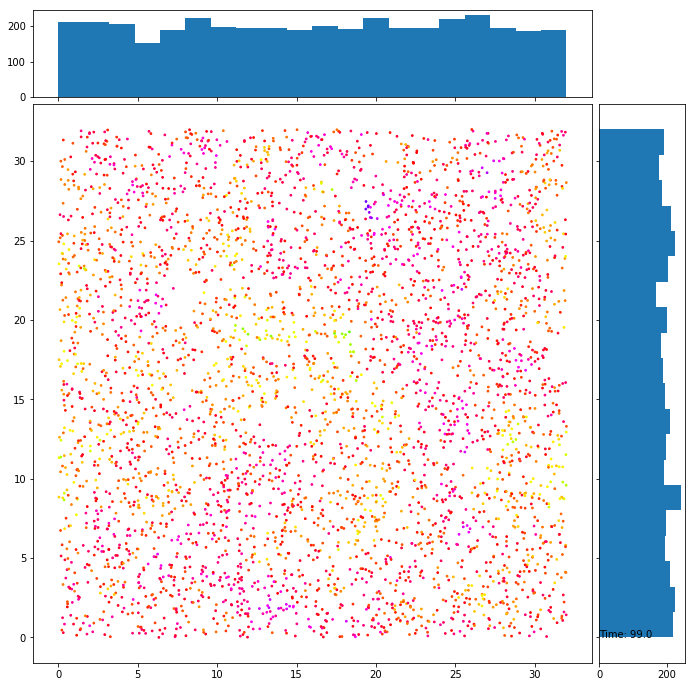

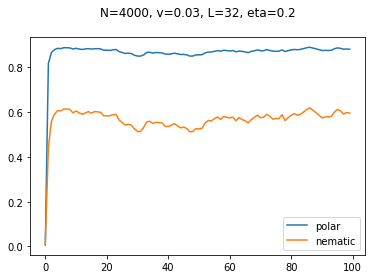

time: 999.0  for eta =  0.2


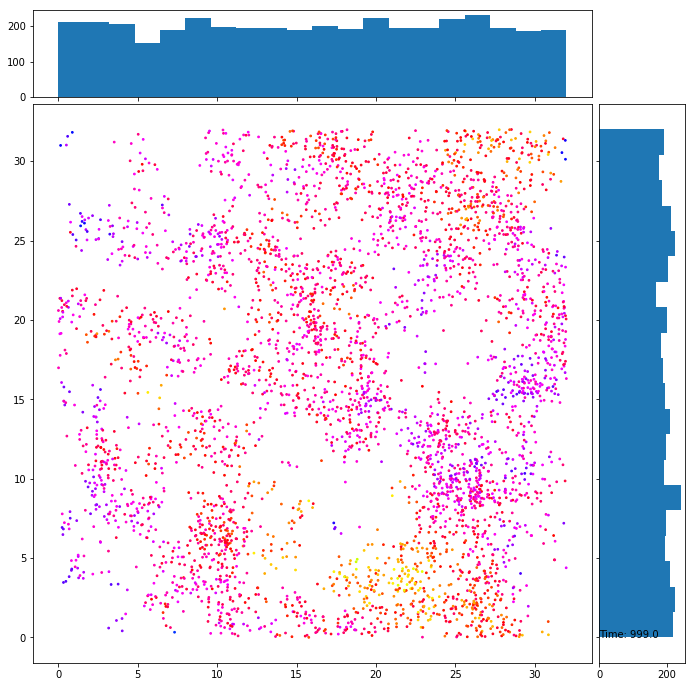

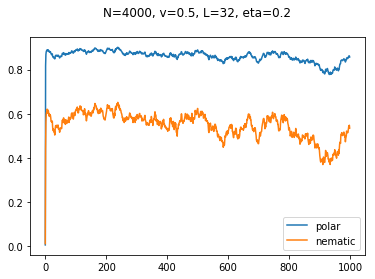

finished


In [7]:
evaluation3("new",1,0)